In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

Text(0.5,0,'Z')

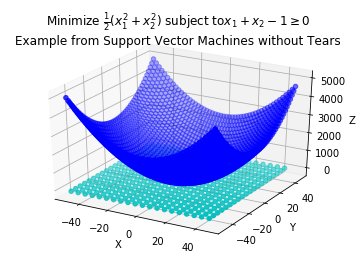

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Minimize $\\frac{1}{2} (x_1^2 + x_2^2)$ subject to$x_1 + x_2 - 1 \\geq 0$' '\n'
             'Example from Support Vector Machines without Tears')

X = np.arange(-50, 50, 2)
Y = np.arange(-50, 50, 2)
X, Y = np.meshgrid(X, Y)
Z = X**2+Y**2

ax.scatter(X, Y, Z, color='b')

X = np.arange(-50, 50, 5)
Y = np.arange(-50, 50, 5)
X, Y = np.meshgrid(X, Y)
Z = X+Y-1

ax.scatter(X, Y, Z, color='c')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')